In [1]:
'''

[课程1.1]  分布分析
分布分析 → 研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量

极差、频率分布情况、分组组距及组数

'''

'\n\n[课程1.1]  分布分析\n分布分析 → 研究数据的分布特征和分布类型，分定量数据、定性数据区分基本统计量\n\n极差、频率分布情况、分组组距及组数\n\n'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# 读取数据
data = pd.read_csv('深圳罗湖二手房信息.csv', engine='python', encoding='gbk')
data

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370
...,...,...,...,...,...,...,...,...
70,598258845,三九花园,南,5833,12.6,42.0,114.089539,22.577080
71,594221866,三九花园,南,5681,15.0,50.0,114.089539,22.577080
72,606700179,城市春天,南北,3571,7.5,25.0,114.083405,22.539505
73,603950517,皇御苑,东北,59701,54.0,180.0,114.081795,22.531393


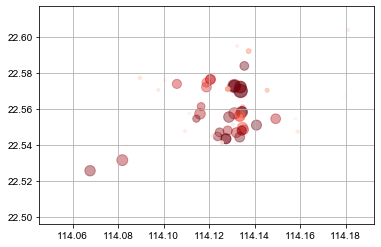

In [4]:
# 做散点图查看分布情况
plt.scatter(data["经度"], data["纬度"],  # 按照经纬度显示
           s = data['房屋单价']/500,  # 按照房屋单价显示点的大小
           c = data['参考总价'], cmap='Reds',  # 按照总价显示颜色
           alpha=0.4)
plt.grid()

In [5]:
# 极差:只针对定量数据字段
def d_range(df, *cols):
    krange = []
    for col in cols:
        crange = df[col].max() - df[col].min()  # 极差
        krange.append(crange)
    return krange

key1 = "参考首付"
key2 = "参考总价"
dr = d_range(data, key1, key2)
print("%s的极差为:%s, \n%s的极差为:%s" % (key1, dr[0], key2, dr[1]))


参考首付的极差为:52.5, 
参考总价的极差为:175.0


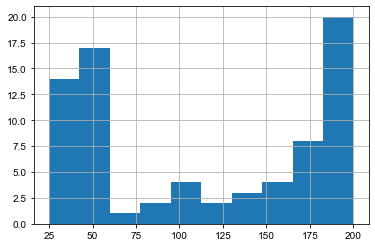

In [6]:
# 频率分布情况:定量字段
data[key2].hist(bins=10)
# 简单查看数据分布，确定分布组数，一般为8-16

In [7]:
# 分成十组
dcut = pd.cut(data[key2], 10, right=False)
data["分组区间"] = dcut
data

,房屋编码,小区,朝向,房屋单价,参考首付,参考总价,经度,纬度,分组区间
0,605093949,大望新平村,南北,5434,15.0,50.0,114.180964,22.603698,"[42.5, 60.0)"
1,605768856,通宝楼,南北,3472,7.5,25.0,114.179298,22.566910,"[25.0, 42.5)"
2,606815561,罗湖区罗芳村,南北,5842,15.6,52.0,114.158869,22.547223,"[42.5, 60.0)"
3,605147285,兴华苑,南北,3829,10.8,36.0,114.158040,22.554343,"[25.0, 42.5)"
4,606030866,京基东方都会,西南,47222,51.0,170.0,114.149243,22.554370,"[165.0, 182.5)"
...,...,...,...,...,...,...,...,...,...
70,598258845,三九花园,南,5833,12.6,42.0,114.089539,22.577080,"[25.0, 42.5)"
71,594221866,三九花园,南,5681,15.0,50.0,114.089539,22.577080,"[42.5, 60.0)"
72,606700179,城市春天,南北,3571,7.5,25.0,114.083405,22.539505,"[25.0, 42.5)"
73,603950517,皇御苑,东北,59701,54.0,180.0,114.081795,22.531393,"[165.0, 182.5)"


In [8]:
# 分组区间中的个数
dcut_count = dcut.value_counts(sort=False)
dcut_count

[25.0, 42.5)        14
[42.5, 60.0)        17
[60.0, 77.5)         1
[77.5, 95.0)         2
[95.0, 112.5)        4
[112.5, 130.0)       2
[130.0, 147.5)       3
[147.5, 165.0)       4
[165.0, 182.5)       8
[182.5, 200.175)    20
Name: 参考总价, dtype: int64

In [9]:
# 频率分布情况
r_zj = pd.DataFrame(dcut_count)
r_zj.rename(columns={dcut_count.name:"频数"}, inplace=True)  # 更改频数名称

# 计算频率
r_zj["频率"] = r_zj["频数"] / r_zj["频数"].sum()
# 计算累计频率
r_zj["累计频率"] = r_zj["频率"].cumsum()
# 换成百分比的格式
r_zj["频率(%)"] = r_zj["频率"].apply(lambda x: "%.2f%%" % (x * 100))
r_zj["累计频率(%)"] = r_zj["累计频率"].apply(lambda x: "%.2f%%" % (x * 100))
# 可视化显示
r_zj.style.bar(subset=["频率", "累计频率"], color='#ff8400', width=100)

,频数,频率,累计频率,频率(%),累计频率(%)
"[25.0, 42.5)",14,0.186667,0.186667,18.67%,18.67%
"[42.5, 60.0)",17,0.226667,0.413333,22.67%,41.33%
"[60.0, 77.5)",1,0.0133333,0.426667,1.33%,42.67%
"[77.5, 95.0)",2,0.0266667,0.453333,2.67%,45.33%
"[95.0, 112.5)",4,0.0533333,0.506667,5.33%,50.67%
"[112.5, 130.0)",2,0.0266667,0.533333,2.67%,53.33%
"[130.0, 147.5)",3,0.04,0.573333,4.00%,57.33%
"[147.5, 165.0)",4,0.0533333,0.626667,5.33%,62.67%
"[165.0, 182.5)",8,0.106667,0.733333,10.67%,73.33%
"[182.5, 200.175)",20,0.266667,1,26.67%,100.00%


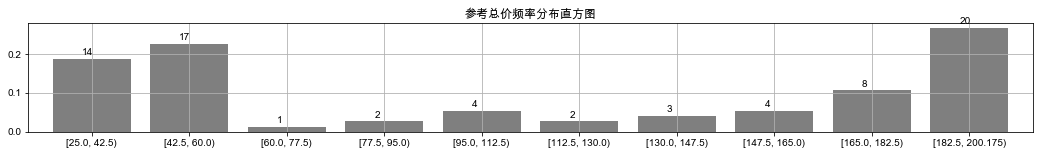

In [10]:
# 频率分布情况 - 定量字段
# 绘制频率直方图
plt.rcParams["font.family"] = 'Arial Unicode MS'
r_zj["频率"].plot(kind='bar', width=0.8, figsize=(18, 2), rot=0, color='k', grid=True, alpha=0.5)
plt.title("参考总价频率分布直方图")  # 绘制直方图
x = len(r_zj)
y = r_zj["频率"]
m = r_zj["频数"]
for i, j, k in zip(range(x), y, m):
    plt.text(i-0.1, j+0.01, "%i" % k, color='k')
# 添加频数标签

In [11]:
# 频率分布情况 - 定性字段
cx_g = data["朝向"].value_counts(sort=False)
print(cx_g)
# 生成频数分布表
r_cx = pd.DataFrame(cx_g)
r_cx.rename(columns={cx_g.name:"频数"}, inplace=True)

# 计算频率
r_cx["频率"] = r_cx["频数"] / r_cx["频数"].sum()
# 计算累计频率
r_cx["累计频率"] = r_cx["频率"].cumsum()
# 转换成百分比格式
r_cx["频率(%)"] = r_cx["频率"].apply(lambda x: "%.2f%%" % (x * 100))
r_cx["累计频率(%)"] = r_cx["累计频率"].apply(lambda x: "%.2f%%" % (x*100))
r_cx.style.bar(subset=["频率", "累计频率"])


东南     5
东北     1
北      4
南北    29
西南     4
东西     1
南     20
东      8
西北     3
Name: 朝向, dtype: int64


,频数,频率,累计频率,频率(%),累计频率(%)
东南,5,0.0666667,0.0666667,6.67%,6.67%
东北,1,0.0133333,0.08,1.33%,8.00%
北,4,0.0533333,0.133333,5.33%,13.33%
南北,29,0.386667,0.52,38.67%,52.00%
西南,4,0.0533333,0.573333,5.33%,57.33%
东西,1,0.0133333,0.586667,1.33%,58.67%
南,20,0.266667,0.853333,26.67%,85.33%
东,8,0.106667,0.96,10.67%,96.00%
西北,3,0.04,1,4.00%,100.00%


(-1.118566947393512,
 1.1008841434345193,
 -1.1098573171340151,
 1.1189942432687938)

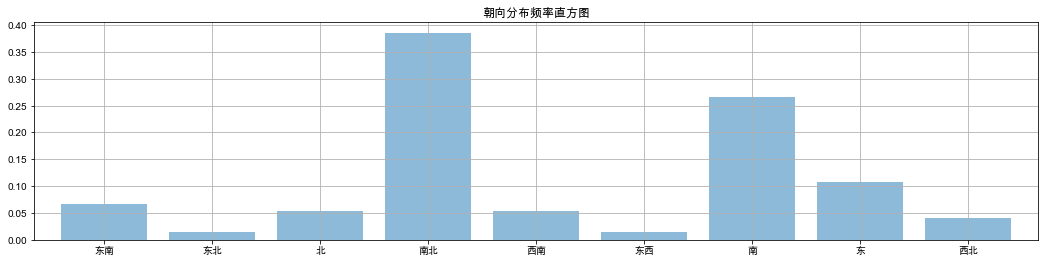

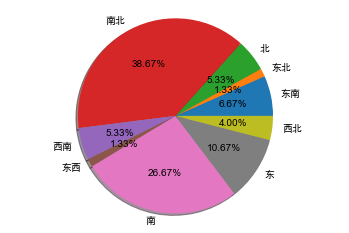

In [12]:
# 频率分布情况 - 定性字段
# 绘制直方图、饼图
plt.figure(num=1, figsize=(18, 4))
r_cx["频率"].plot(kind="bar", title="朝向分布频率直方图", grid=True, alpha=0.5, width=0.8, rot=0)

plt.figure(num=2)
plt.pie(r_cx["频数"], labels=r_cx.index, autopct="%.2f%%", shadow=True)
plt.axis('equal')
# 绘制饼图
